# Working with Xarray

In [ ]:
"""==============================================================================

 Title          :XarrayExample.ipynb
 Description    :Reading, slicing, and graph nc files using xarrat
 Author         :LF Velasquez - MA
 Date           :May 15 2021
 Version        :1.0
 Usage          :XarrayExample.ipynb
 Notes          : 
                - Files need to follow the standard nc format
 python version :3.8.5

=============================================================================="""

**Adding data directory**

In [1]:
data_directory = '/mnt/c/Users/C0060017/Documents/Taught_Material/MRes_Dissertation/Dissertation/Data/test'

!ls {data_directory}

3B-DAY.MS.MRG.3IMERG.20000601-S000000-E235959.V06.nc4.nc4
clipped_netcdf.nc
clipped_netcdf_new.nc
rainfall_hadukgrid_uk_12km_day_18910101-18910131.nc
test.nc4
test.nc4.aux.xml


**Importing Modules**

In [3]:
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
import datetime

# Set some plotting defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

In [4]:
dataset_gpm = xr.load_dataset(data_directory + '/test.nc4')
dataset_had = xr.load_dataset(data_directory + '/rainfall_hadukgrid_uk_12km_day_18910101-18910131.nc')
dataset_gvn = xr.load_dataset(data_directory + '/3B-DAY.MS.MRG.3IMERG.20000601-S000000-E235959.V06.nc4.nc4')

/home/lfpv/.local/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/lfpv/.local/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
dataset_gvn

<xarray.Dataset>
Dimensions:           (lat: 121, lon: 111, time: 1)
Coordinates:
  * lat               (lat) float32 48.95 49.05 49.15 ... 60.75 60.85 60.95
  * lon               (lon) float32 -9.05 -8.95 -8.85 -8.75 ... 1.75 1.85 1.95
  * time              (time) object 2000-06-01 00:00:00
Data variables:
    precipitationCal  (time, lon, lat) float32 0.4644 0.5599 ... 16.74 15.5
Attributes:
    BeginDate:       2000-06-01
    BeginTime:       00:00:00.000Z
    EndDate:         2000-06-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2000-06-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR.MS.MRG.3IMERG.20000601-S000000-E002959.0000.V06B....
    title:           GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 ...
    DOI:             10.5067/GPM/IMERGDF/DAY/06
    ProductionTime:  2019-06-18T20:51:50.167Z
    history:         2021-06-01 17:45:01 GMT Hyrax-1.15.4 https://gpm1.gesdis...

In [25]:
# View the file information GPM
dataset_gpm

<xarray.Dataset>
Dimensions:                    (lat: 1800, lon: 3600, nv: 2, time: 1)
Coordinates:
  * lon                        (lon) float32 -179.9 -179.8 ... 179.9 179.9
  * lat                        (lat) float32 -89.95 -89.85 ... 89.85 89.95
  * time                       (time) object 2000-06-01 00:00:00
Dimensions without coordinates: nv
Data variables:
    precipitationCal           (time, lon, lat) float32 nan nan nan ... nan nan
    precipitationCal_cnt       (time, lon, lat) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    precipitationCal_cnt_cond  (time, lon, lat) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    HQprecipitation            (time, lon, lat) float32 nan nan nan ... nan nan
    HQprecipitation_cnt        (time, lon, lat) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    HQprecipitation_cnt_cond   (time, lon, lat) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    randomError                (time, lon, lat) float32 nan nan nan ... nan nan
    randomError_cnt            (time, lon, lat) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    time_bnds                  (time, nv) object 2000-06-01 00:00:00 2000-06-...
Attributes:
    BeginDate:       2000-06-01
    BeginTime:       00:00:00.000Z
    EndDate:         2000-06-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2000-06-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR.MS.MRG.3IMERG.20000601-S000000-E002959.0000.V06B....
    title:           GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 ...
    DOI:             10.5067/GPM/IMERGDF/DAY/06
    ProductionTime:  2019-06-18T20:51:50.167Z

In [26]:
# View file information HadUK
dataset_had

<xarray.Dataset>
Dimensions:                       (bnds: 2, projection_x_coordinate: 82, projection_y_coordinate: 112, time: 31)
Coordinates:
  * time                          (time) datetime64[ns] 1891-01-01T12:00:00 ....
  * projection_y_coordinate       (projection_y_coordinate) float64 -1.02e+05...
  * projection_x_coordinate       (projection_x_coordinate) float64 -2.1e+05 ...
    latitude                      (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                     (projection_y_coordinate, projection_x_coordinate) float64 ...
Dimensions without coordinates: bnds
Data variables:
    rainfall                      (time, projection_y_coordinate, projection_x_coordinate) float64 ...
    transverse_mercator           int32 -2147483647
    time_bnds                     (time, bnds) datetime64[ns] 1891-01-01T09:0...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 -1....
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 -2....
Attributes:
    comment:        Daily resolution gridded climate observations
    creation_date:  2020-08-07T16:29:23
    frequency:      day
    institution:    Met Office
    references:     doi: 10.1002/joc.1161
    short_name:     daily_rainfall
    source:         HadUK-Grid_v1.0.2.1
    title:          Gridded surface climate observations data for the UK
    version:        v20200731
    Conventions:    CF-1.5

**Slicing data by time period**

In [42]:
dataset_gpm['precipitationCal'].sel(time='2000-06-01 00:00:00')

<xarray.DataArray 'precipitationCal' (time: 1, lon: 3600, lat: 1800)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 179.9
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * time     (time) object 2000-06-01 00:00:00
Attributes:
    units:      mm
    long_name:  Daily accumulated precipitation (combined microwave-IR) estimate

In [52]:
dataset_had['rainfall'].sel(time=slice("1891-01-01", "1891-01-01"))

<xarray.DataArray 'rainfall' (time: 1, projection_y_coordinate: 112, projection_x_coordinate: 82)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time                     (time) datetime64[ns] 1891-01-01T12:00:00
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                (projection_y_coordinate, projection_x_coordinate) float64 ...
Attributes:
    standard_name:  lwe_thickness_of_precipitation_amount
    long_name:      Total precipitation amount
    units:          mm
    description:    Total rainfall
    label_units:    mm
    plot_label:     Total rainfall (mm)
    cell_methods:   time: sum
    grid_mapping:   transverse_mercator

In [47]:
f2 = dataset_gvn.sel(lon=slice(-13.75003, 1.84997), lat=slice(49.85002, 60.85002))

**Plotting the data**

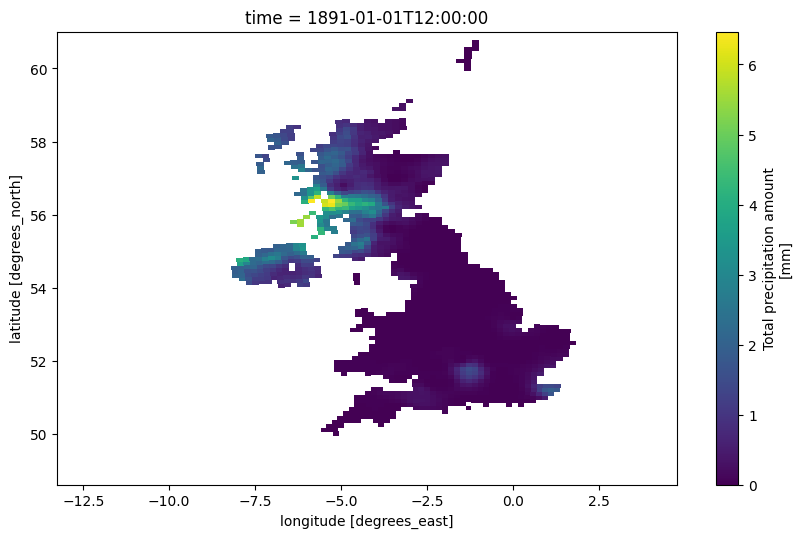

In [54]:
(
    dataset_had['rainfall']
    .sel(time=slice("1891-01-01", "1891-01-01"))
).plot(x='longitude', y='latitude')


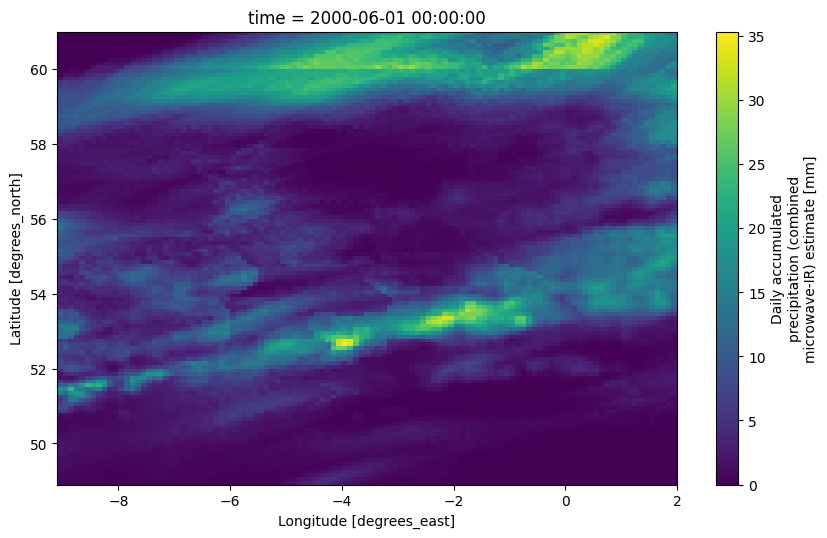

In [89]:
(
    dataset_gvn['precipitationCal']
    .sel(time='2000-06-01 00:00:00')
).plot(x='lon', y='lat')

**Slicing and Plotting GPM data using HadUK coordinates**

In [72]:
slice_gpm = dataset_gpm.sel(lon=slice(-12.5, 4.66), lat=slice(48.68, 60.79))

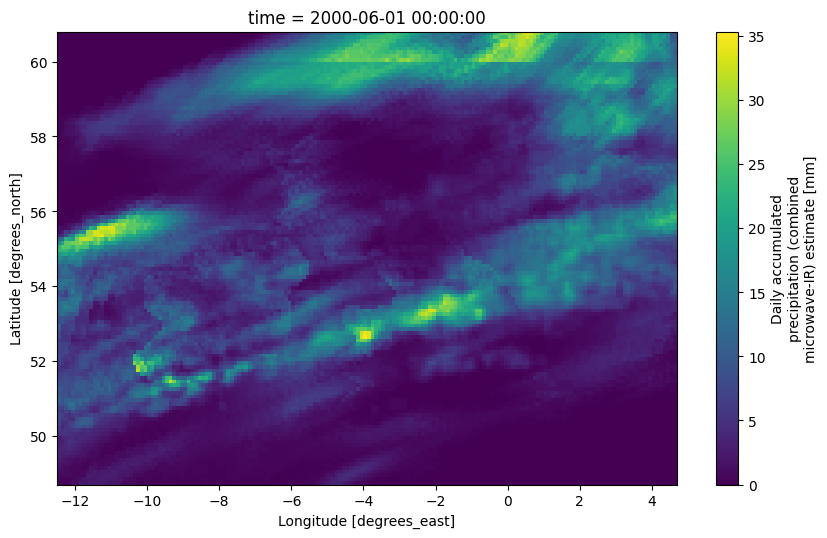

In [73]:
(
    slice_gpm['precipitationCal']
    .sel(time='2000-06-01 00:00:00')
).plot(x='lon', y='lat')

## Selecting data from variable

In [72]:
# Reading the precipitation value
precipitation = dataset_gvn['precipitationCal']

In [73]:
precipitation

<xarray.DataArray 'precipitationCal' (time: 1, lon: 111, lat: 111)>
array([[[1.8180994e+00, 1.8861724e+00, 1.5426892e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.6774877e+00, 1.8665342e+00, 1.2794054e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.5067555e+00, 1.6625001e+00, 1.3766004e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [5.0294426e-09, 0.0000000e+00, 1.6780588e-04, ...,
         1.7454638e+01, 1.7316530e+01, 1.7726072e+01],
        [3.3223173e-09, 0.0000000e+00, 2.5799155e-04, ...,
         1.7394794e+01, 1.7033945e+01, 1.5752076e+01],
        [8.9095229e-09, 0.0000000e+00, 4.9145491e-04, ...,
         1.6335199e+01, 1.6742558e+01, 1.5503109e+01]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 49.95 50.05 50.15 50.25 ... 60.65 60.75 60.85 60.95
  * lon      (lon) float32 -9.05 -8.95 -8.85 -8.75 -8.65 ... 1.65 1.75 1.85 1.95
  * time     (time) object 2000-06-01 00:00:00
Attributes:
    units:         mm
    long_name:     Daily accumulated precipitation (combined microwave-IR) es...
    origname:      precipitationCal
    fullnamepath:  /precipitationCal

## Mask NetCDF time series data using a shapefile

**Import modules**

In [53]:
import geopandas
import rioxarray
from shapely.geometry import mapping

In [74]:
# Setting spatial dimmension in nc data
precipitation.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
precipitation.rio.write_crs("epsg:4326", inplace=True)

# Set mask based on boundary
uk_admn = geopandas.read_file('/mnt/d/MRes_dataset/active_Data/101_admin/uk_admin_boundary_py_nasa_pp_countryOutlineFromGiovanni.shp', crs="epsg:4326")
# Data for UK
gpm_ToClip = precipitation
uk_imerg = gpm_ToClip.rio.clip(uk_admn.geometry.apply(mapping), uk_admn.crs, drop=False)

# Saving clipped xarray as nc file:
uk_imerg.to_netcdf('/mnt/c/Users/C0060017/Documents/Taught_Material/MRes_Dissertation/Dissertation/Data/test/clipped_netcdf_new.nc')


In [55]:
uk_imerg

<xarray.DataArray 'precipitationCal' (time: 1, lon: 3600, lat: 1800)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon          (lon) float64 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 179.9
  * lat          (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * time         (time) object 2000-06-01 00:00:00
    spatial_ref  int64 0
Attributes:
    units:      mm
    long_name:  Daily accumulated precipitation (combined microwave-IR) estimate

(48.0, 60.0)

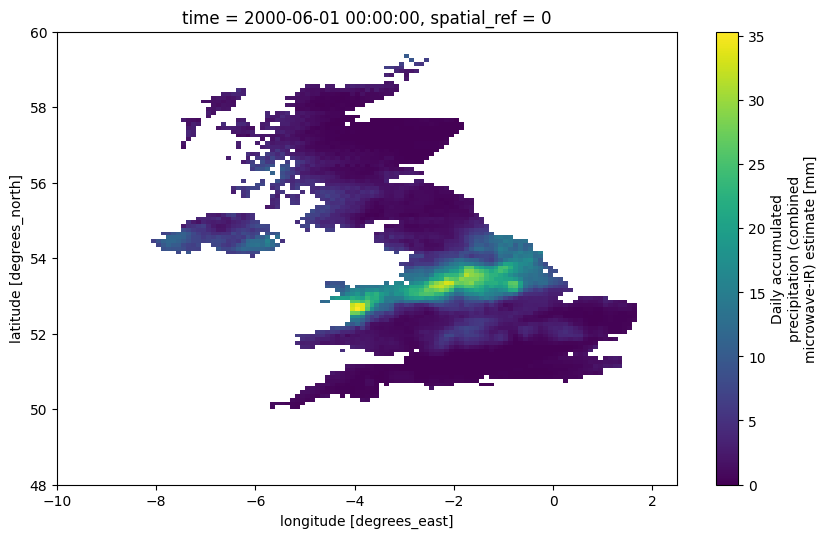

In [75]:
(
    uk_imerg
    .sel(time='2000-06-01 00:00:00')
).plot(x='lon', y='lat')

plt.xlim([-10, 2.5])
plt.ylim([48, 60])
